# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


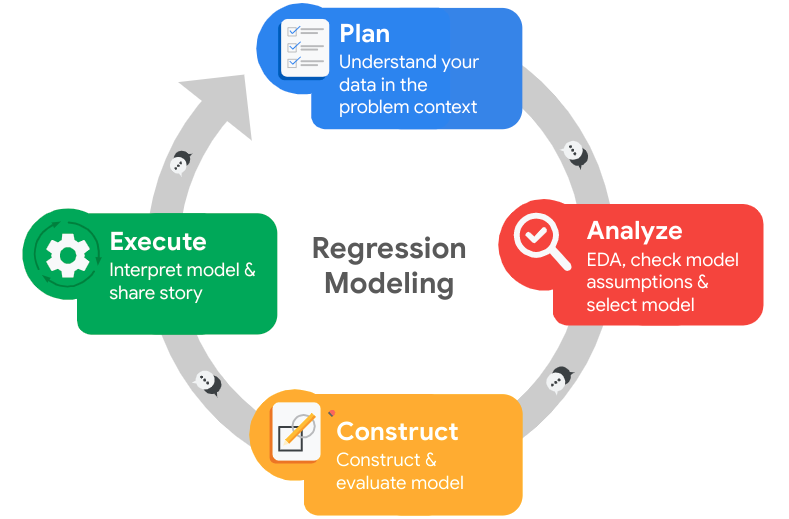

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
pip install imbalanced-learn==0.8.1

     |████████████████████████████████| 189 kB 24.4 MB/s            
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import numpy as np
import imblearn

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
df = df0.copy()

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [7]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(" ","_")
              .str.replace("-","_"))


df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [15]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### There are no missing values in the dataset

### Check duplicates

Check for any duplicate entries in the data.

In [16]:
df.duplicated().sum()

3008

In [17]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


##### After analyzing the dataset for duplicate rows, I found that although several records appear identical across all columns, these duplicates do not necessarily indicate data quality issues. The dataset contains employee-level HR information (such as satisfaction score, evaluation score, number of projects, tenure, work accidents, and promotion history). Since many employees can naturally share the same characteristics and work conditions, identical rows are expected rather than erroneous.

##### These duplicates represent different employees with similar profiles, not repeated entries of the same individual. Because the dataset does not include a unique employee identifier, dropping such rows would incorrectly remove legitimate observations and distort the true distribution of employee behaviors.

##### Therefore, duplicates were retained, as they reflect realistic patterns in employee populations.

### Check outliers

Check for outliers in the data.

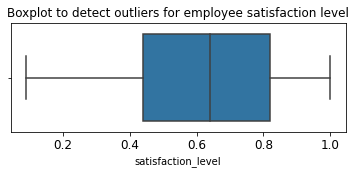

In [18]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for employee satisfaction level')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['satisfaction_level'])
plt.show()

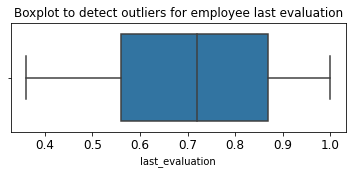

In [20]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for employee last evaluation')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['last_evaluation'])
plt.show()

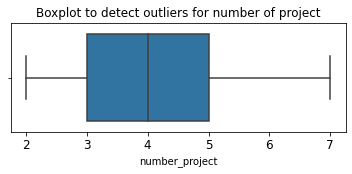

In [21]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for number of project')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['number_project'])
plt.show()

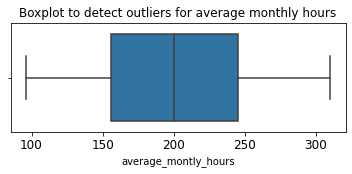

In [22]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for average monthly hours')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['average_montly_hours'])
plt.show()

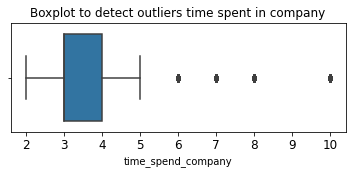

In [23]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers time spent in company')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['time_spend_company'])
plt.show()

## 📊 Outlier Analysis Summary

---

### **1. Satisfaction Level**

- The boxplot for `satisfaction_level` does **not** show any outliers.
- Employee satisfaction ranges smoothly between **0 and 1**.
- This indicates a naturally distributed variation without extreme or erroneous values.

**Insight:**  
_No outliers detected. All values fall within the expected range for employee satisfaction. No treatment required._

---

### **2. Average Monthly Working Hours**

- No clear outliers are observed in `average_monthly_hours`.
- The mean value is approximately **210 hours/month**, which aligns with real-world expectations:

  > 40–45 working hours/week × 4.3 weeks/month ≈ 172–195 hours

- Some employees work above 200 hours, but this is **plausible** and not erroneous.

**Insight:**  
_Although some employees work more hours than average, these values are realistic and do not indicate data errors. Outlier treatment not required._

---

### **3. Time Spent in Company**

- The boxplot shows statistical outliers around **6–10 years** of tenure.
- However, these are **not business outliers**, as employees can realistically remain long-term.
- The dataset lacks employee IDs, and tenure may be influenced by salary, promotions, department, and career progression.

**Insight:**  
_These are statistical outliers due to distribution skew, not data errors. Long-tenure employees provide meaningful insights into promotions, turnover, and retention. These values will be retained._

---

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [24]:
# Count of people who left vs stayed
print("Counts:")
print(df['left'].value_counts())
print("\n")

# Percentage of people who left vs stayed
print("Percentages:")
print(df['left'].value_counts(normalize=True))

Counts:
0    11428
1     3571
Name: left, dtype: int64


Percentages:
0    0.761917
1    0.238083
Name: left, dtype: float64


###### The dataset shows a moderate class imbalance, with significantly more employees who stayed than employees who left. This imbalance is important because machine learning models may become biased toward predicting “stayed” (the majority class).

In [25]:
# Count of people who got promotion in last 5 years
print("Counts:")
print(df['promotion_last_5years'].value_counts())
print("\n")

# Percentage of people who got promotion in last 5 years
print("Percentages:")
print(df['promotion_last_5years'].value_counts(normalize=True))

Counts:
0    14680
1      319
Name: promotion_last_5years, dtype: int64


Percentages:
0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64


##### This indicates that only about 2.1% of employees were promoted in the past five years, while the overwhelming majority, 97.9%, did not receive any promotion.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

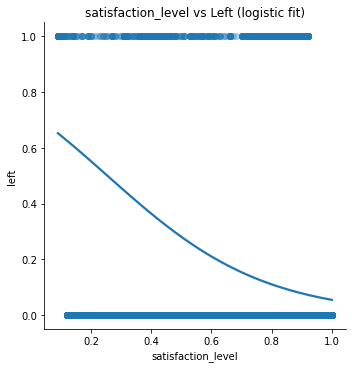

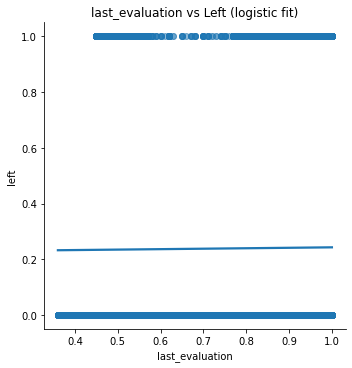

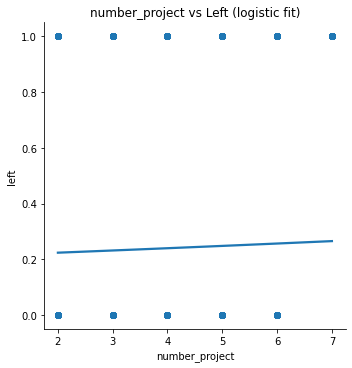

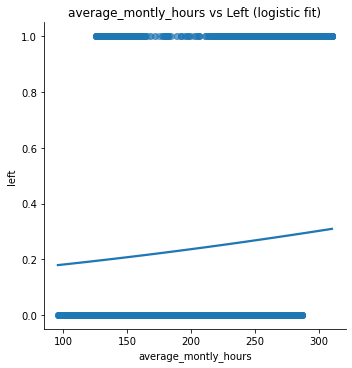

In [26]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']

for col in cols:
    sns.lmplot(x=col, y='left', data=df, logistic=True, ci=None, scatter_kws={'alpha':0.3})
    plt.title(f'{col} vs Left (logistic fit)')
    plt.show()

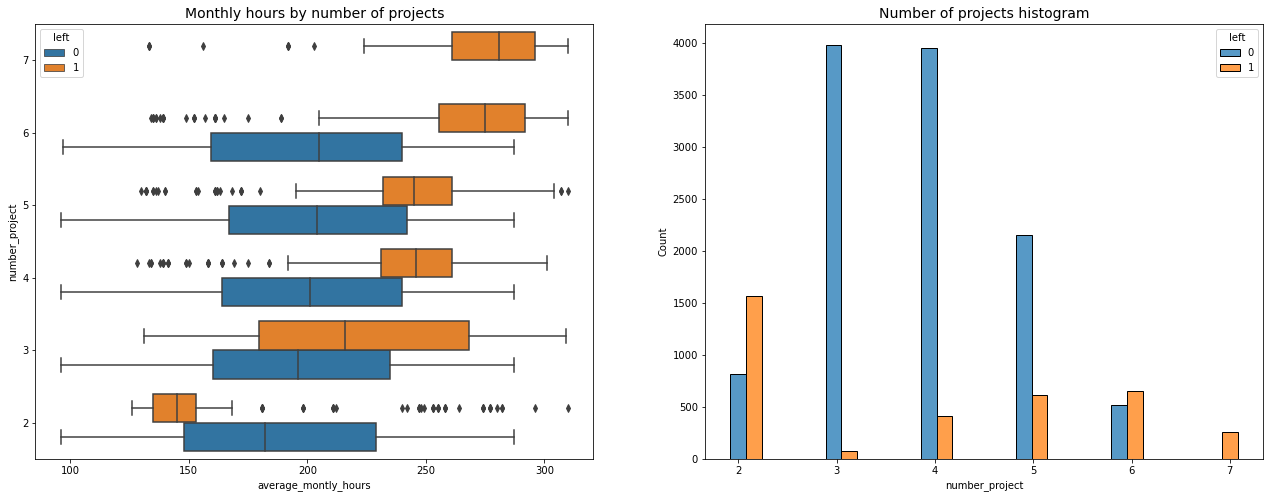

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df, x='average_montly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [28]:
df[df['number_project']==7]['left'].value_counts()

1    256
Name: left, dtype: int64

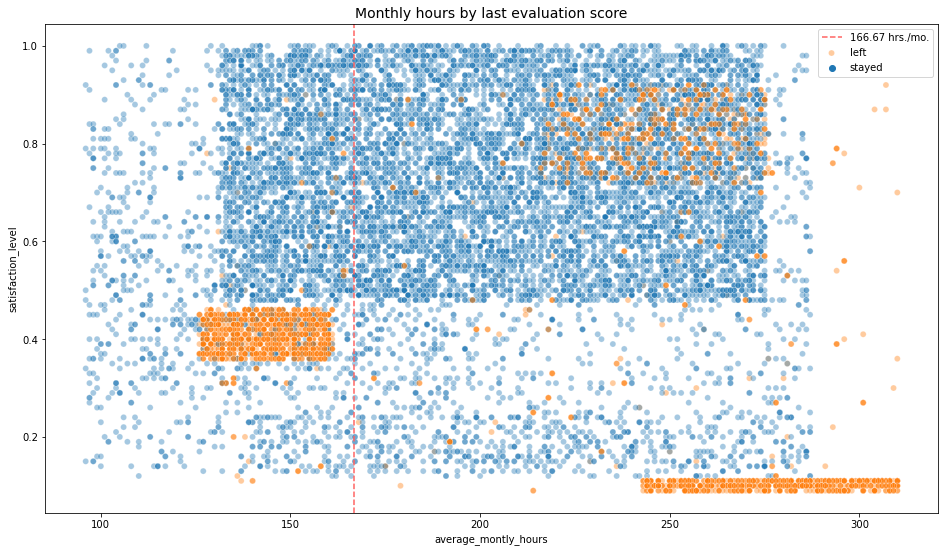

In [29]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

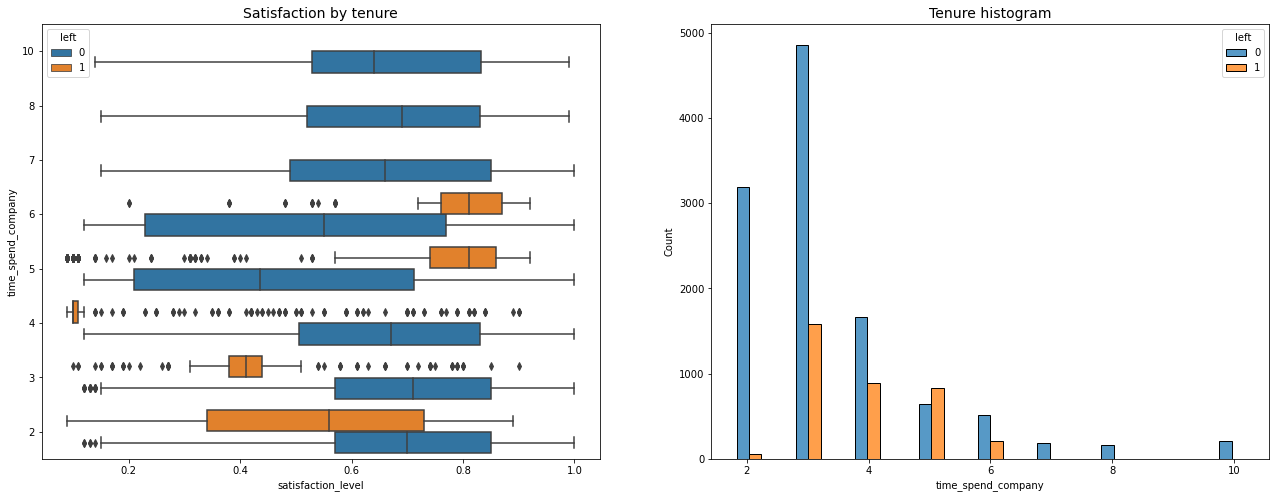

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df, x='satisfaction_level', y='time_spend_company', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')


tenure_stay = df[df['left']==0]['time_spend_company']
tenure_left = df[df['left']==1]['time_spend_company']
sns.histplot(data=df, x='time_spend_company', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();


There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

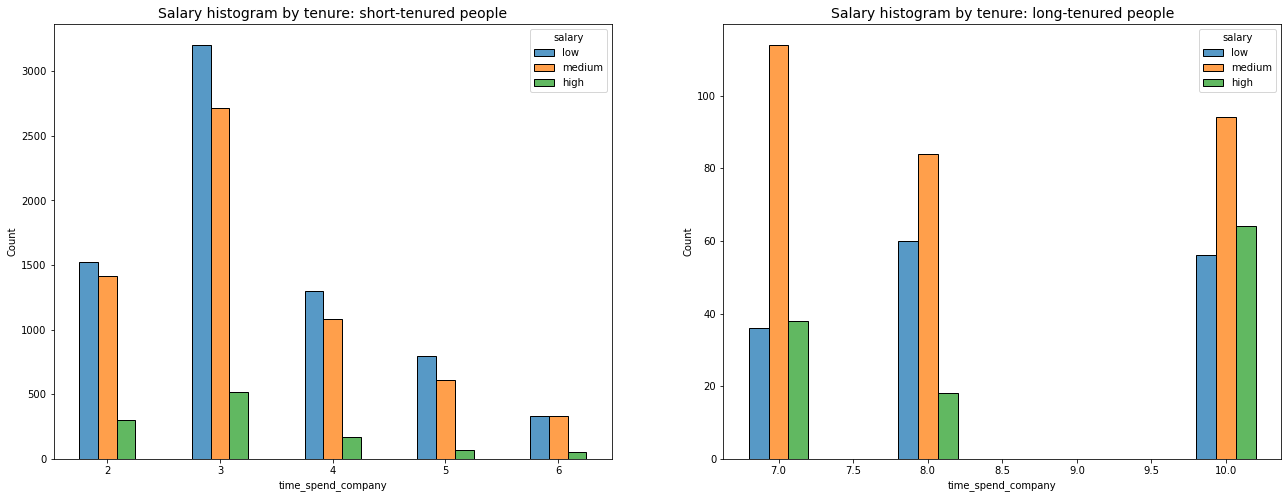

In [32]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['time_spend_company'] < 7]

# Define long-tenured employees
tenure_long = df[df['time_spend_company'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

###### The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

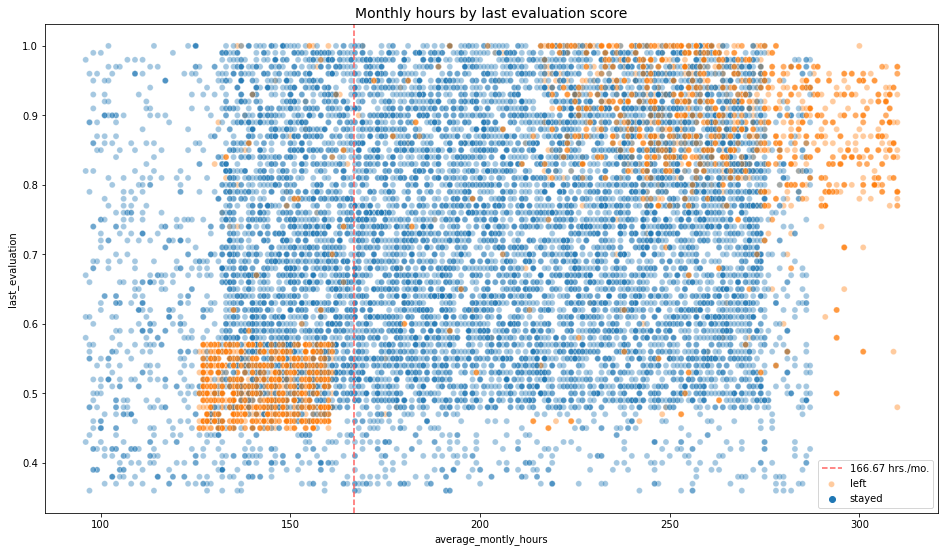

In [33]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_montly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

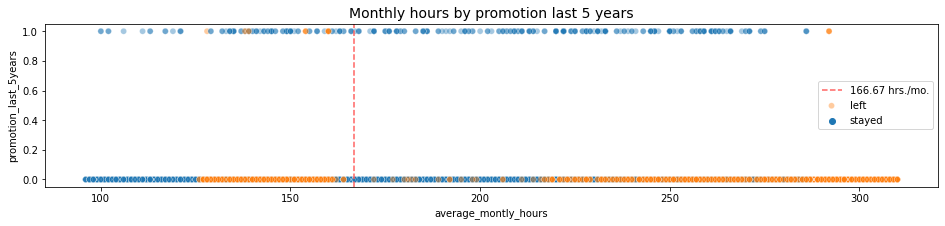

In [34]:
# Create a plot as needed
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

In [35]:
df["department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

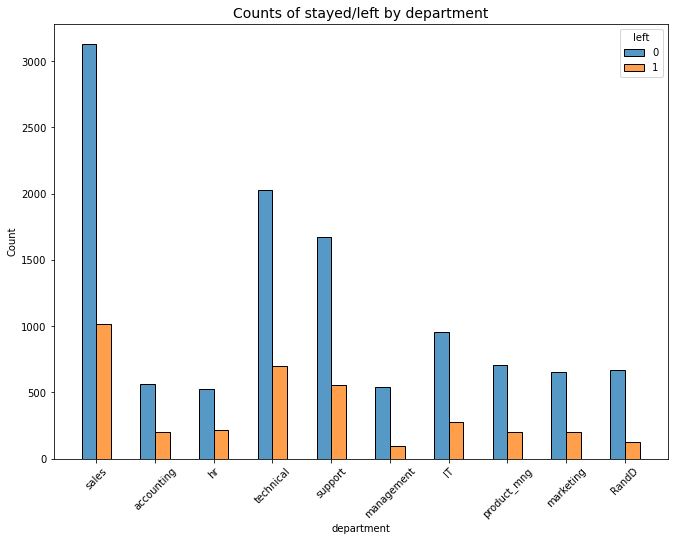

In [36]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


##### There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 


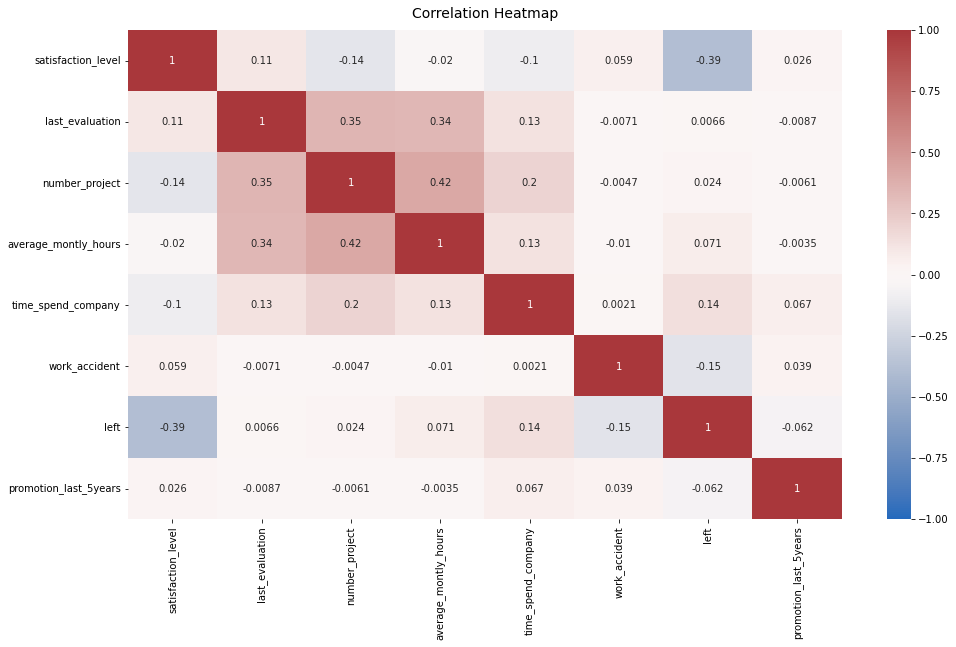

In [37]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

##### The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [38]:
# Map salary to numeric values
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['salary'] = df['salary'].map(salary_mapping)

In [39]:
df = pd.get_dummies(df,columns=['department'],drop_first=True)

In [40]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [42]:
X = df.drop('left',axis=1)

In [43]:
y = df['left']

In [44]:
df.shape

(14999, 18)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
smote = SMOTE(random_state=42)

In [47]:
X_train_res, y_train_res = smote.fit_resample(X_train,y_train)

In [51]:
X_train_res.shape, y_train_res.shape

((18284, 17), (18284,))

In [52]:
X_test.shape, y_test.shape

((3000, 17), (3000,))

In [53]:
log_clf = LogisticRegression(random_state=42,max_iter=500).fit(X_train_res,y_train_res)

In [54]:
y_pred = log_clf.predict(X_test)

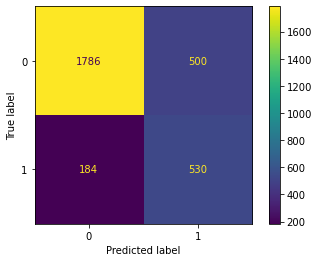

In [55]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

In [62]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.91      0.78      0.84      2286
    Predicted would leave       0.51      0.74      0.61       714

                 accuracy                           0.77      3000
                macro avg       0.71      0.76      0.72      3000
             weighted avg       0.81      0.77      0.78      3000



### Modeling Approach B: Tree-based Model

In [64]:
rf = RandomForestClassifier(random_state=42)

In [66]:
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=42)

In [68]:
y_pred_rf = rf.predict(X_test)

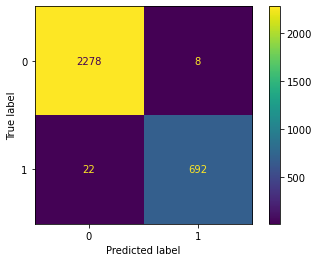

In [69]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred_rf, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [70]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2286
    Predicted would leave       0.99      0.97      0.98       714

                 accuracy                           0.99      3000
                macro avg       0.99      0.98      0.99      3000
             weighted avg       0.99      0.99      0.99      3000



In [71]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [72]:
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
y_pred_xgb = xgb.predict(X_test)

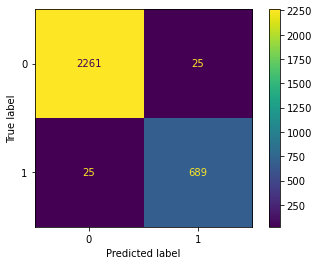

In [75]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred_xgb, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [76]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      0.99      0.99      2286
    Predicted would leave       0.96      0.96      0.96       714

                 accuracy                           0.98      3000
                macro avg       0.98      0.98      0.98      3000
             weighted avg       0.98      0.98      0.98      3000



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.